<h1>Initialize DF</h1>

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 5.20MB/s]


In [5]:
!unzip /content/heart-attack-analysis-prediction-dataset.zip

Archive:  /content/heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Image

In [7]:
df = pd.read_csv('/content/heart.csv')

In [8]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<h1>Apa itu Algoritma KNN (K-Nearest Neighbor)?</h1>
	Algoritma K-Nearest Neighbor (KNN) adalah algoritma machine learning yang bersifat non-parametric dan lazy learning. Metode yang bersifat non-parametric memiliki makna bahwa metode tersebut tidak membuat asumsi apa pun tentang distribusi data yang mendasarinya. Dengan kata lain, tidak ada jumlah parameter atau estimasi parameter yang tetap dalam model, terlepas data tersebut berukuran kecil ataupun besar.

	Kesimpulannya adalah, KNN adalah algoritma yang memprediksi suatu data, dengan data yang sudah ada / data yang dilatihkan.


<h1>Penggunaan Algoritma KNN</h1>
KNN dapat digunakan untuk prediksi penyakit seperti diabetes, penyakit jantung, kanker, atau bahkan prediksi penyakit infeksi berdasarkan gejala. Dengan dataset yang baik dan preprocessing yang tepat, KNN dapat menjadi alat yang efektif dalam mendukung diagnosis awal penyakit.


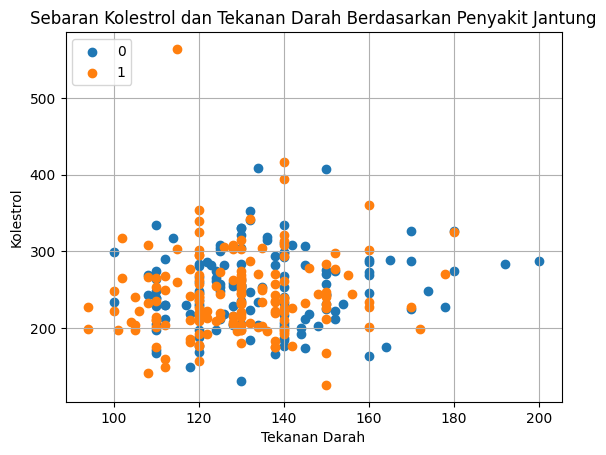

In [9]:
fig, ax = plt.subplots()
for penyakit_jantung, data in df.groupby('output'):
  ax.scatter(data['trtbps'], data['chol'], label=penyakit_jantung)

ax.legend(loc='upper left')
plt.title('Sebaran Kolestrol dan Tekanan Darah Berdasarkan Penyakit Jantung')
plt.xlabel('Tekanan Darah')
plt.ylabel('Kolestrol')
plt.grid(True)
plt.show()

<h1>Preprocessing Dataset</h1>


In [11]:
x_train = np.array(df[['trtbps', 'chol']])
y_train = np.array(df['output'])

print(f'X_train:\n{x_train[:5]}\n')
print(f'y_train:\n{y_train[:5]}')

X_train:
[[145 233]
 [130 250]
 [130 204]
 [120 236]
 [120 354]]

y_train:
[1 1 1 1 1]


In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train[:5]}')

y_train:
[[1]
 [1]
 [1]
 [1]
 [1]]


In [13]:
y_train = y_train.flatten()
print(f'y_train:\n{y_train[:5]}')

y_train:
[1 1 1 1 1]


<h1>Training KNN Classification Model</h1>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<h1>Prediksi Output</h1>

In [15]:
trtbps = 140
chol = 210
X_new = np.array([[trtbps, chol]]).reshape(1,-1)
X_new

array([[140, 210]])

In [16]:
Y_new = model.predict(X_new)
Y_new

array([0])

In [17]:
lb.inverse_transform(Y_new)

array([0])

<h1>Kalkulasi Distance (Euclidean Distance)</h1>

In [18]:
misterius = np.array([trtbps, chol])
misterius

array([140, 210])

In [21]:
x_train

array([[145, 233],
       [130, 250],
       [130, 204],
       [120, 236],
       [120, 354],
       [140, 192],
       [140, 294],
       [120, 263],
       [172, 199],
       [150, 168],
       [140, 239],
       [130, 275],
       [130, 266],
       [110, 211],
       [150, 283],
       [120, 219],
       [120, 340],
       [150, 226],
       [150, 247],
       [140, 239],
       [135, 234],
       [130, 233],
       [140, 226],
       [150, 243],
       [140, 199],
       [160, 302],
       [150, 212],
       [110, 175],
       [140, 417],
       [130, 197],
       [105, 198],
       [120, 177],
       [130, 219],
       [125, 273],
       [125, 213],
       [142, 177],
       [135, 304],
       [150, 232],
       [155, 269],
       [160, 360],
       [140, 308],
       [130, 245],
       [104, 208],
       [130, 264],
       [140, 321],
       [120, 325],
       [140, 235],
       [138, 257],
       [128, 216],
       [138, 234],
       [130, 256],
       [120, 302],
       [130,

In [22]:
from scipy.spatial.distance import euclidean

distance = [euclidean(misterius, d) for d in x_train]
distance

[23.53720459187964,
 41.23105625617661,
 11.661903789690601,
 32.802438933713454,
 145.38225476308997,
 18.0,
 84.0,
 56.64803615307419,
 33.83784863137726,
 43.174066289845804,
 29.0,
 65.76473218982953,
 56.88585061331157,
 30.01666203960727,
 73.68174807915459,
 21.93171219946131,
 131.52946437965906,
 18.867962264113206,
 38.3275357934736,
 29.0,
 24.515301344262525,
 25.079872407968907,
 16.0,
 34.48187929913333,
 11.0,
 94.14881836751856,
 10.198039027185569,
 46.09772228646444,
 207.0,
 16.401219466856727,
 37.0,
 38.58756276314948,
 13.45362404707371,
 64.76109943476871,
 15.297058540778355,
 33.06055050963308,
 94.13288479590966,
 24.166091947189145,
 60.876925020897694,
 151.32745950421557,
 98.0,
 36.40054944640259,
 36.05551275463989,
 54.91812087098393,
 111.0,
 116.72617529928752,
 25.0,
 47.042533945356304,
 13.416407864998739,
 24.08318915758459,
 47.07440918375928,
 94.14881836751856,
 23.259406699226016,
 76.05918747922567,
 42.2965719651132,
 10.816653826391969,
 21.

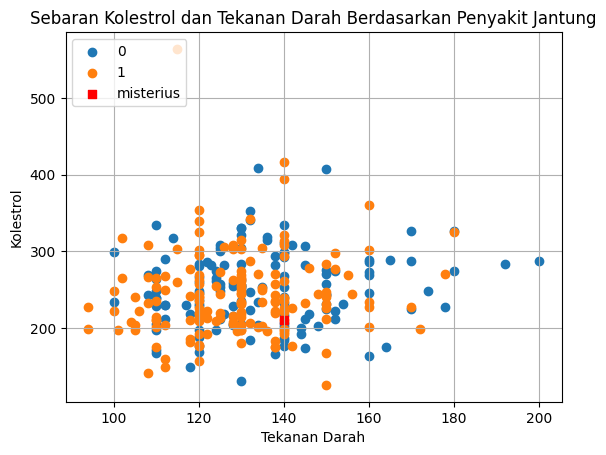

In [28]:
fig, ax = plt.subplots()
for jk, d in df.groupby('output'):
  ax.scatter(d['trtbps'], d['chol'], label=jk)

plt.scatter(
    trtbps,
    chol,
    marker='s',
    color="red",
    label='misterius'
)

ax.legend(loc='upper left')
plt.title('Sebaran Kolestrol dan Tekanan Darah Berdasarkan Penyakit Jantung')
plt.xlabel('Tekanan Darah')
plt.ylabel('Kolestrol')
plt.grid(True)
plt.show()

<h1>Testing Model</h1>

In [23]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 45]])
y_test = lb.transform(np.array([0, 1, 0, 1]))

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')


X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  45]]

y_test:
[[0]
 [1]
 [0]
 [1]]


In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.25


In [ ]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.3333333333333333


In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 0.5


In [25]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.4


In [26]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [27]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: -0.5773502691896258
